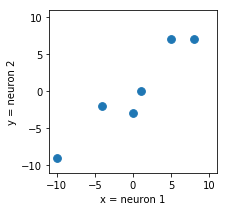

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array([5,-4,8,-10,1,0])
y = np.array([7,-2,7,-9,0,-3])

A = np.concatenate((x[np.newaxis,:], y[np.newaxis,:]))

# plot neuron activity
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111)
ax.scatter(x,y,s=60)
ax.set_xlabel('x = neuron 1')
ax.set_ylabel('y = neuron 2')
ax.set_xlim(-11,11)
ax.set_ylim(-11,11)
plt.show()

What is the covariance between neuron 1's firing and neuron 2's firing?
$$\frac{1}{N_\text{stim}}\Sigma_{i=1}^{N_\text{stim}} (x_i - \bar x) (y_i - \bar y)$$

If both are mean zero:
$$\frac{1}{N_\text{stim}}\Sigma_{i=1}^{N_\text{stim}} x_i y_i = \vec x^\top \vec y$$

Covariance matrix:
$$\frac{1}{N_\text{stim}} \begin{bmatrix} \vec x^\top \vec x & \vec x^\top \vec y \\ \vec y^\top \vec x & \vec y^\top \vec y \end{bmatrix} = 
\frac{1}{N_\text{stim}}\begin{bmatrix} \vec x^\top \\ \vec y^\top \end{bmatrix} \begin{bmatrix} \vec x & \vec y \end{bmatrix}=
\frac{1}{N_\text{stim}}\begin{bmatrix} \vec x^\top \\ \vec y^\top \end{bmatrix} \begin{bmatrix} \vec x^\top \\ \vec y^\top \end{bmatrix}^\top = 
\frac{1}{N_\text{stim}} AA^\top$$

In [5]:
print('covariance matrix')
covA = np.matmul(A, A.T) / A.shape[1]
print('[[ %2.1f, %2.1f ],\n [ %2.1f, %2.1f ]]'%(covA[0,0],covA[0,1],covA[1,0],covA[1,1]))

# find eigenvalues and eigenvectors of covariance matrix
lam, v = np.linalg.eig( covA )

print( 'eigenvalues: %2.1f, %2.1f'%(lam[0],lam[1]))
print( 'eigenvectors: [%2.2f,%2.2f], [%2.2f,%2.2f]'%(v[0,0],v[1,0],v[0,1],v[1,1]))

covariance matrix
[[ 34.3, 31.5 ],
 [ 31.5, 32.0 ]]
eigenvalues: 64.7, 1.6
eigenvectors: [0.72,0.69], [-0.69,0.72]


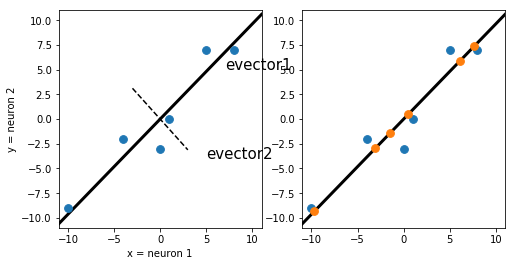

In [32]:
# plot neuron activity with eigenvectors
fig = plt.figure(figsize=(8,4))

ax = fig.add_subplot(121)
ax.scatter(n1,n2,s=60)
ax.plot( np.array([-11,11]), np.array([-11,11])*v[1,0]/v[0,0], color='k', zorder=0, lw=3 )
ax.plot( np.array([-3,3]), np.array([-3,3])*v[1,1]/v[0,1], '--', color='k', zorder=0 )
ax.text( 7,  5, 'evector1',fontsize=15)
ax.text( 5, -4, 'evector2',fontsize=15)
ax.set_xlabel('x = neuron 1')
ax.set_ylabel('y = neuron 2')
ax.set_xlim(-11,11)
ax.set_ylim(-11,11)

ax = fig.add_subplot(122)
ax.scatter(n1,n2,s=60)
# PROJECTION OF A ONTO V!
proj = v[:,0][:,np.newaxis] * np.matmul(v[:,0].T, A)
ax.scatter(proj[0,:], proj[1,:], s=60)
ax.plot( np.array([-11,11]), np.array([-11,11])*v[1,0]/v[0,0], color='k', zorder=0, lw=3 )
ax.set_xlim(-11,11)
ax.set_ylim(-11,11)

plt.show()